# Part II - Loan Data from Prosper Exploration
## by Sang Nguyen Trong


## Investigation Overview

- Introduction
- Preliminary Wrangling
- Univariate Exploration
- Bivariate Exploration
- Multivariate Exploration
- Conclusion


## Dataset Overview

> Loan amount, borrower rate (or rate of interest), current loan status, borrower income, and 81 additional characteristics are among the 113,937 loans in the Prosper loan dataset.


Prosper, the pioneering peer-to-peer lending platform in the United States, was founded in 2005. Over the years, Prosper has facilitated the provision of over $12 billion in loans, benefiting more than 770,000 borrowers. This platform offers individuals the opportunity to engage in socially beneficial investments that can generate profits. (origin: https://about.prosper.com)


Borrowers seeking fixed-rate, fixed-term loans ranging from 2,000 USD to  40,000 USD can conveniently apply through Prosper's online platform. On the other side, investors can take advantage of the opportunity to invest in these loans, thereby supporting individuals and organizations in achieving their financial goals. Prosper assumes the responsibility of managing all aspects of loan servicing on behalf of the matched investors and borrowers, ensuring a seamless and efficient process.


Through Prosper, both borrowers and investors can leverage the advantages of peer-to-peer lending to access financial resources, establish mutually beneficial relationships, and contribute to the growth of the lending ecosystem.


## Dataset Summary

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

C:\Users\trong\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# load in the dataset into a pandas dataframe
df_prosper_loan = pd.read_csv('prosperLoanData.csv')
print(df_prosper_loan.shape[0])
df_prosper_loan.head()

113937


,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [3]:
df_prosper_loan['AverageCreditScore'] = (df_prosper_loan.CreditScoreRangeUpper + df_prosper_loan.CreditScoreRangeLower)/2
df_prosper_loan_substitute = df_prosper_loan.query('LoanStatus in ["Completed", "Defaulted", "Chargedoff"] &\
                                     AverageCreditScore>=400')

## 1. Distribution of Missing Values in the Data Set
> One valuable suggestion is to visually examine the presence of missing values, given the abundance of variables in the dataset. The bar graph below provides insights into this analysis, revealing the extent of missing values across various columns. Notably, several columns exhibit a high number of missing values, including TotalProsperLoans, TotalProsperPaymentsBilled, OnTimeProsperPayments, ProsperPaymentsLessThanOneMonthLate, ProsperPaymentsOneMonthPlusLate, ProsperPrincipalBorrowed, ProsperPrincipalOutstanding, ScorexChangeAtTimeOfListing, LoanCurrentDaysDelinquent, and LoanFirstDefaultedCyclenumber. 

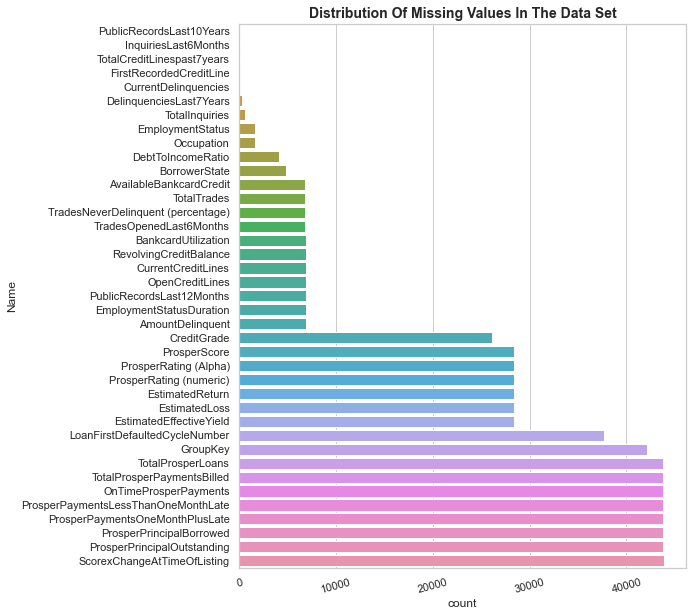

In [4]:
missing_values = df_prosper_loan_substitute.isnull().sum() 
missing_values = missing_values[missing_values > 0]
missing_values.sort_values(inplace=True)
# Create a DataFrame of the missing values
missing_values = pd.DataFrame(missing_values)
missing_values.columns = ['count']
missing_values.index.names = ['Name']
missing_values['Name'] = missing_values.index
# Plot the bar chart
plt.figure(figsize=(8,10))
sb.set(style="whitegrid", color_codes=True)
sb.barplot(x = 'count', y = 'Name', data=missing_values)
plt.xticks(rotation = 15)
plt.title('Distribution of Missing Values in the Data Set'.title(),fontsize=14,weight='bold');
plt.show()

## 2. Distribution of Loan Status.
> This observation indicates that a significant portion of the loans in the dataset has been successfully repaid, while a smaller proportion has resulted in defaults.

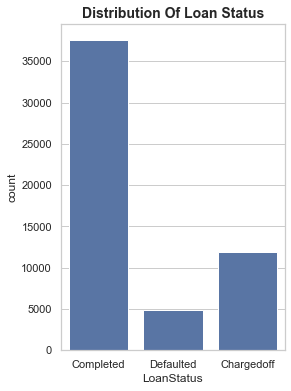

In [5]:
import seaborn as sb
import matplotlib.pyplot as plt

def plot_loan_status_distribution(data):
    plt.figure(figsize=(4, 6))
    sb.countplot(x='LoanStatus', data=data, color=sb.color_palette()[0])
    plt.title('Distribution of Loan Status'.title(), fontsize=14, weight='bold')
    plt.show()

# Call the function with your DataFrame
plot_loan_status_distribution(df_prosper_loan_substitute)

## 3. Status of Employment Distribution
> According to the distribution of job status, more persons in our dataset are employed than unemployed.

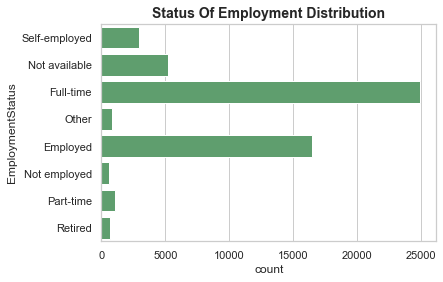

In [6]:
## Status of Employment Distribution
color=sb.color_palette()[2]
sb.countplot(y='EmploymentStatus', data =df_prosper_loan_substitute, color=color);
plt.title('Status of Employment Distribution'.title(),fontsize=14,weight='bold');

## 4. Average Credit Score Distribution
> The lowest and upper limits of the credit score range seem to be left skewed, but after more research, it seems that only a small number of values are below 400 and above, where the majority of the data is concentrated. The distribution for both the upper and lower credit limit appears to follow a normal distribution when replotting with those values only greater than 400. Since the distribution of values in the upper and lower credit score ranges is comparable, using the average of these two columns' values will be simpler.

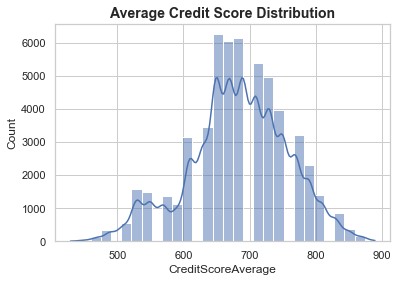

In [7]:
# Calculate the average credit score
df_prosper_loan_substitute['CreditScoreAverage'] = (df_prosper_loan_substitute.CreditScoreRangeLower + df_prosper_loan_substitute.CreditScoreRangeUpper)/2
# Plot the histogram
sb.histplot(x='CreditScoreAverage', data=df_prosper_loan_substitute[df_prosper_loan_substitute.CreditScoreAverage>=400], bins=30, kde=True);
plt.title('Average Credit Score Distribution'.title(),fontsize=14,weight='bold');

## 5. Ploting how many referrals the borrower had at the time the listing was made:
> The revised analysis, utilizing a lower bin size and a logarithmic scale for the count axis, reveals a right-skewed distribution of suggestions with the majority falling below the threshold of 10.

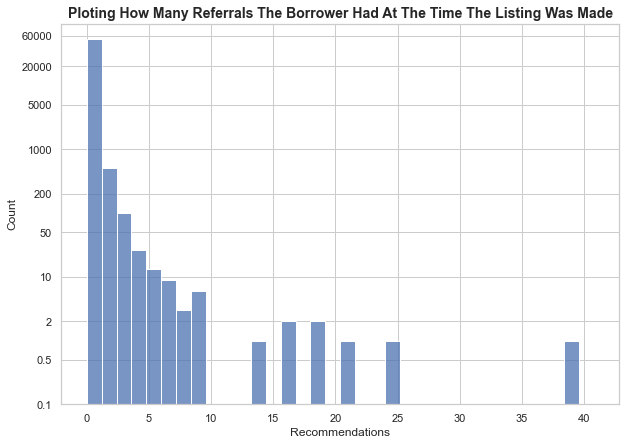

In [8]:
##Ploting how many referrals the borrower had at the time the listing was made:
# Assign a color to the plot
color = sb.color_palette()[0]
# Create a figure with a width and height of 10 and 7 inches
plt.figure(figsize=(10, 7))
# Create a list of evenly spaced bins from 0 to 40, with a spacing of 1.2
bins = np.arange(0, 40+1.2, 1.2)
# Plot a histogram of the `Recommendations` column in the `df_prosper_loan_substitute` DataFrame, using the specified color and bins
sb.histplot(x='Recommendations', data=df_prosper_loan_substitute, bins=bins, color=color)
# Set the y-axis scale to logarithmic
plt.yscale('log')
# Create a list of y-ticks at the specified values
yticks = [0.1, 0.5, 2, 10, 50, 200, 1000, 5000, 20000, 60000]
# Set the y-ticks to the specified values
plt.yticks(yticks, yticks);
plt.title('Ploting how many referrals the borrower had at the time the listing was made'.title(),fontsize=14,weight='bold');

##  6. In Group vs Loan Status at the moment

> In contrast to the (6000) finished loans for individuals who are members of a group, the majority of those who do not belong to any group successfully completed their loans (30 000).

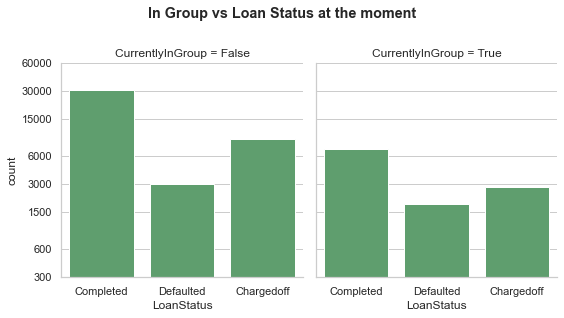

In [9]:
request = df_prosper_loan_substitute.LoanStatus.unique()
g = sb.FacetGrid(data=df_prosper_loan_substitute, col='CurrentlyInGroup', height=4)
g.map(sb.countplot, 'LoanStatus', order=request,color=sb.color_palette()[2])
plt.ylabel('CurrentlyInGroup'.title(), fontsize = 14, weight = "bold")
g.set(yscale='log')
yticks=[300, 600, 1500, 3000, 6000, 15000, 30000, 60000]
g.set(yticks=yticks, yticklabels=yticks)
plt.suptitle("In Group vs Loan Status at the moment", y=1.1, weight = 'bold');


## 7. Isborrowerhomeowner VS Loan Status

> The graph above demonstrates that a borrower's ownership status does not appear to affect whether a loan will be repaid in whole, charged off, or defaulted.

<Figure size 576x720 with 0 Axes>

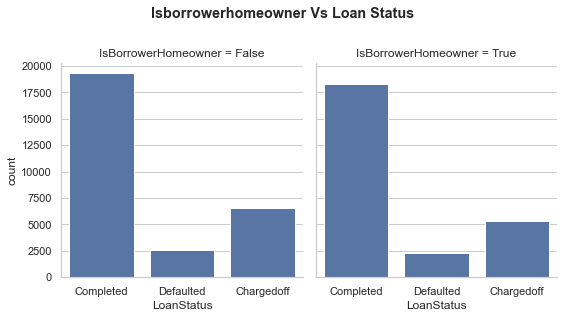

In [10]:
plt.figure(figsize=(8,10))
sb.set(style="whitegrid", color_codes=True)
g = sb.FacetGrid(data=df_prosper_loan_substitute, col='IsBorrowerHomeowner', height=4)
g.map(sb.countplot, 'LoanStatus', order=request)
plt.suptitle('Isborrowerhomeowner VS Loan Status'.title(),weight='bold', y=1.1);

## 8. Prosper Score VS Employement Status:
> Employed Borrowers receive the highest Prosper rating.
The number of Prosper Rated Borrowers in various Employment Statuses differs greatly.

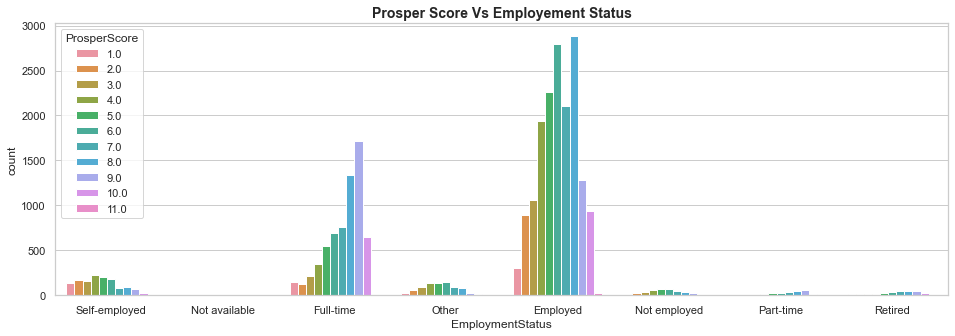

In [11]:
mt_counts=df_prosper_loan_substitute.groupby(['EmploymentStatus','ProsperScore']).size()
mt_counts=mt_counts.reset_index(name='count')
mt_counts = mt_counts.pivot(index = 'EmploymentStatus' , columns = 'ProsperScore' , values = 'count')
mt_counts
plt.figure(figsize = [16,5])
axis = sb.countplot(data = df_prosper_loan_substitute, x = 'EmploymentStatus' , hue = 'ProsperScore');
plt.xticks();
plt.title('Prosper Score VS Employement Status'.title(),fontsize=14,weight='bold');

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [ ]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt

> In the classroom workspace, the generated HTML slideshow will be placed in the home folder. 

> In local machines, the command above should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 

### Submission
If you are using classroom workspace, you can choose from the following two ways of submission:

1. **Submit from the workspace**. Make sure you have removed the example project from the /home/workspace directory. You must submit the following files:
   - Part_I_notebook.ipynb
   - Part_I_notebook.html or pdf
   - Part_II_notebook.ipynb
   - Part_I_slides.html
   - README.md
   - dataset (optional)


2. **Submit a zip file on the last page of this project lesson**. In this case, open the Jupyter terminal and run the command below to generate a ZIP file. 
```bash
zip -r my_project.zip .
```
The command abobve will ZIP every file present in your /home/workspace directory. Next, you can download the zip to your local, and follow the instructions on the last page of this project lesson.
